# I Classification
____________________________________________________________________________________________________________

### Load the reduced MNIST digit dataset
#### Each sample is an 8x8 image representing a handwritten digit

In [294]:
# Import necessary modules
from sklearn import datasets, svm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

# Load the digits dataset: digits
digits = datasets.load_digits()

### Split the dataset before applying the classifier

In [295]:
from sklearn.model_selection import train_test_split
import numpy as np

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123456)

## 1. k-Nearest neighbours
### Implement KNN classification for the above dataset.

In [296]:
# Implement knn
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)

print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (1437, 64)
Y_train shape:  (1437,)
X_test shape:  (360, 64)
Y_test shape:  (360,)


### For K = 1 ... 10, use KNN on digits to train model, then test accuracy on test set

In [297]:
from sklearn.neighbors import KNeighborsClassifier

# Scores = array of tuples (train_score, test_score) referring to k = index + 1
knn_train_scores = []
knn_test_scores = []

# For k's 1 to 9
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_train_scores.append( knn.score(X_train, y_train) )
    knn_test_scores.append( knn.score(X_test, y_test) )

### Plot the accuracy scores of each k value

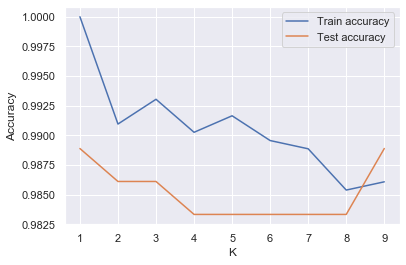

In [298]:
plt.plot(range(1,10), knn_train_scores, label='Train accuracy')
plt.plot(range(1,10), knn_test_scores, label='Test accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()

## 2. Implement SVM classifier for MNIST dataset.

### Compute and compare the accuracy scores for at least 3 different kernels by using metrics.classification_report.

In [299]:
linear = svm.SVC(kernel='linear')
linear.fit(X_train, y_train)

poly = svm.SVC(kernel='poly')
poly.fit(X_train, y_train)

sigmoid = svm.SVC(kernel='sigmoid')
sigmoid.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Classification report for linear kernel

In [300]:
print("Classification report for classifier ", linear)
print(classification_report(y_test, linear.predict(X_test)))

Classification report for classifier  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        28
           3       0.98      0.96      0.97        47
           4       0.97      0.97      0.97        40
           5       1.00      0.94      0.97        36
           6       1.00      0.97      0.99        40
           7       0.94      1.00      0.97        32
           8       0.97      0.97      0.97        35
           9       0.94      0.91      0.92        33

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weigh

## Classification report for poly kernel

In [301]:
print("Classification report for classifier ", poly)
print(classification_report(y_test, poly.predict(X_test)))

Classification report for classifier  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        47
           4       1.00      1.00      1.00        40
           5       1.00      0.94      0.97        36
           6       1.00      0.97      0.99        40
           7       0.91      1.00      0.96        32
           8       1.00      1.00      1.00        35
           9       0.94      0.97      0.96        33

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighte

## Classification report for sigmoid kernel

In [302]:
print("Classification report for classifier ", sigmoid)
print(classification_report(y_test, sigmoid.predict(X_test)))

Classification report for classifier  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.70      0.78      0.74        36
           2       0.92      0.82      0.87        28
           3       0.97      0.83      0.90        47
           4       0.93      0.93      0.93        40
           5       0.97      0.92      0.94        36
           6       0.97      0.90      0.94        40
           7       0.78      0.97      0.86        32
           8       0.80      0.69      0.74        35
           9       0.72      0.88      0.79        33

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weig

### Poly kernel would be the kernel of choice out of the above 3 as it yields 0.98 precision, recall and f1-score on the test data 🏆 

## 3. Naive Bayes
### Compute	the	accuracy scores	and	plot the confusion matrix of the same dataset using Naïve Bayes classifier

In [303]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Text(30.5, 0.5, 'True label')

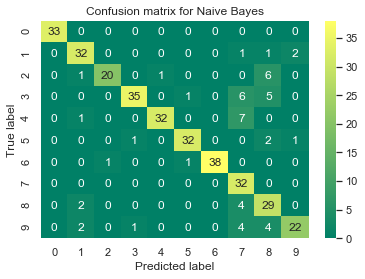

In [304]:
gaussian_predictions = gaussian.predict(X_test)
cm = confusion_matrix(y_test, gaussian_predictions)
sns.set()
ax = sns.heatmap(cm, annot=True, cmap='summer')
ax.set_title('Confusion matrix for Naive Bayes')
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")

## Classification report for Naive Bayes

In [305]:
print(classification_report(y_test, gaussian_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.84      0.89      0.86        36
           2       0.95      0.71      0.82        28
           3       0.95      0.74      0.83        47
           4       0.97      0.80      0.88        40
           5       0.94      0.89      0.91        36
           6       1.00      0.95      0.97        40
           7       0.59      1.00      0.74        32
           8       0.62      0.83      0.71        35
           9       0.88      0.67      0.76        33

    accuracy                           0.85       360
   macro avg       0.87      0.85      0.85       360
weighted avg       0.88      0.85      0.85       360



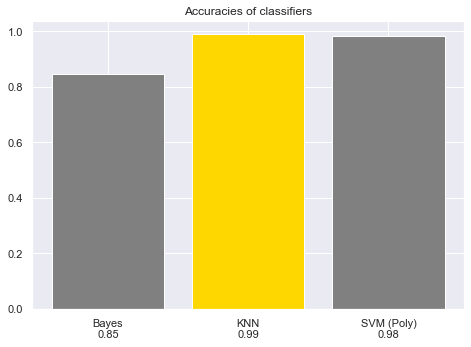

In [306]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Accuracies of each clf
bayes_acc = classification_report(y_test, gaussian_predictions, output_dict=True)["accuracy"]
knn_acc = max(knn_test_scores)
svm_acc = classification_report(y_test, poly.predict(X_test), output_dict=True)["accuracy"]

accuracies = [bayes_acc, knn_acc, svm_acc]
clfs = ['Bayes\n{:.2f}'.format(bayes_acc), 'KNN\n{:.2f}'.format(knn_acc), 'SVM (Poly)\n{:.2f}'.format(svm_acc)]

# Hightlight best
clrs = ['grey' if (x < max(accuracies)) else 'gold' for x in accuracies ]

ax.bar(clfs, accuracies, color=clrs)
ax.set_title("Accuracies of classifiers")
plt.show()

# II Regression
__________________________________________________________________________________________________________________

## 1. Linear regression

### Work with Gapminder data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population.

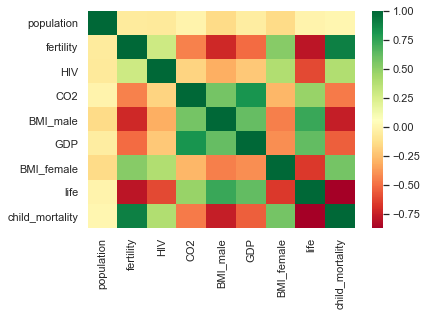

In [307]:
import pandas as pd
gapminder = pd.read_csv('gapminder.csv')
gapminder.head()

sns.heatmap(gapminder.corr(), cmap="RdYlGn")

## Single variable linear regression on fertility, GDP and population with 5-fold cross validations

Score:  0.6639939235614483
5fold average: 61.69%


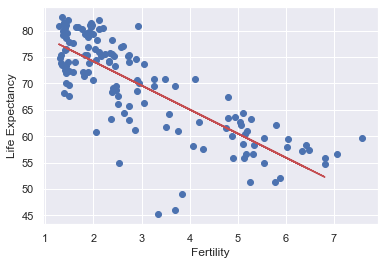

In [465]:
from sklearn.linear_model import LinearRegression
from sklearn import model_selection


X = gapminder["fertility"].values.reshape(-1,1)
y = gapminder["life"].values.reshape(-1,1)

# Train test split
fert_X_train, fert_X_test, fert_y_train, fert_y_test = train_test_split(X, y, test_size=0.2)

fert_reg = LinearRegression().fit(fert_X_train, fert_y_train)

plt.scatter(X, y)
plt.xlabel("Fertility")
plt.ylabel("Life Expectancy")
plt.plot(fert_X_test, fert_reg.predict(fert_X_test), c='r')

fert_r2_score = r2_score(fert_y_test, fert_reg.predict(fert_X_test))
print("Score: ", fert_r2_score)

fert_r2_5fold = model_selection.KFold(n_splits=5)
fert_r2_5fold_score = model_selection.cross_val_score(fert_reg, X, y, cv=fert_r2_5fold).mean()*100


print("5fold average: %.2f%%" % fert_r2_5fold_score)

Score:  0.4780220120733254
5fold average: 32.27%


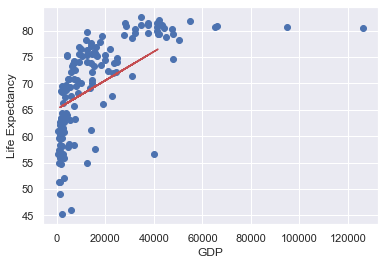

In [470]:
X = gapminder["GDP"].values.reshape(-1,1)
y = gapminder["life"].values.reshape(-1,1)

# Train test split
gdp_X_train, gdp_X_test, gdp_y_train, gdp_y_test = train_test_split(X, y, test_size=0.2)

gdp_reg = LinearRegression().fit(gdp_X_train, gdp_y_train)

plt.scatter(X, y)
plt.xlabel("GDP")
plt.ylabel("Life Expectancy")
plt.plot(gdp_X_test, gdp_reg.predict(gdp_X_test), c='r')

gdp_r2_score = r2_score(gdp_y_test, gdp_reg.predict(gdp_X_test))
print("Score: ", gdp_r2_score)

gdp_r2_5fold = model_selection.KFold(n_splits=5)
gdp_r2_5fold_score = model_selection.cross_val_score(gdp_reg, X, y, cv=gdp_r2_5fold).mean()*100


print("5fold average: %.2f%%" % gdp_r2_5fold_score)

Score:  -0.03575746360557819
5fold average: -3.90%


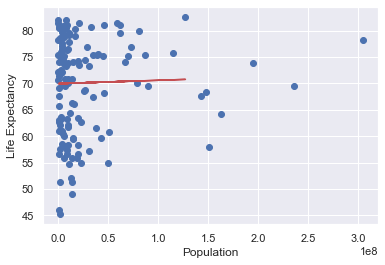

In [475]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# Remove outlier country in population
population = gapminder["population"]
outlieridx = population.idxmax()
population = population.drop(index=outlieridx)

X = population.values.reshape(-1,1)
y = gapminder["life"].drop(index=outlieridx).values.reshape(-1,1)

pop_X_train, pop_X_test, pop_y_train, pop_y_test = train_test_split(X, y, test_size=0.2)

pop_reg = LinearRegression().fit(pop_X_train, pop_y_train)

plt.scatter(X, y)
plt.xlabel("Population")
plt.ylabel("Life Expectancy")
plt.plot(pop_X_test, pop_reg.predict(pop_X_test), c='r')

pop_r2_score = r2_score(pop_y_test, pop_reg.predict(pop_X_test))
print("Score: ", pop_r2_score)

pop_r2_5fold = model_selection.KFold(n_splits=5)
pop_r2_5fold_score = model_selection.cross_val_score(pop_reg, X, y, cv=pop_r2_5fold).mean()*100


print("5fold average: %.2f%%" % pop_r2_5fold_score)

In [477]:
from sklearn.linear_model import LinearRegression

X = gapminder.drop(["Region", "life"], axis=1).values
y = gapminder["life"].values.reshape(-1,1)

all_reg = LinearRegression().fit(X_train, y_train)
all_X_train, all_X_test, all_y_train, all_y_test = train_test_split(X, y, test_size=0.2)


all_r2_score = r2_score(all_y_test, all_reg.predict(all_X_test))

all_r2_5fold = model_selection.KFold(n_splits=5)
all_r2_5fold_score = model_selection.cross_val_score(all_reg, X, y, cv=all_r2_5fold).mean()*100

print("Score: ", all_r2_score)

print("5fold average: %.2f%%" % all_r2_5fold_score)

Score:  0.8944462191893354
5fold average: 86.00%


## Model scores

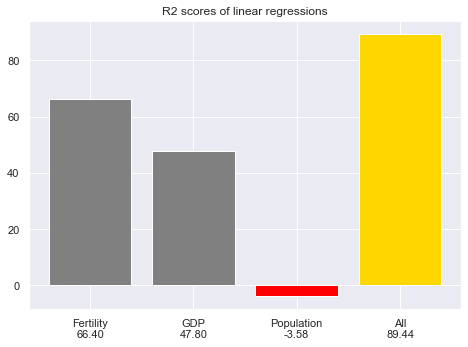

In [490]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Accuracies of each clf

r2_scores = [fert_r2_score * 100, gdp_r2_score * 100, pop_r2_score * 100, all_r2_score * 100]
clfs = ['Fertility\n{:.2f}'.format(fert_r2_score*100),
        'GDP\n{:.2f}'.format(gdp_r2_score*100),
        'Population\n{:.2f}'.format(pop_r2_score*100),
        'All\n{:.2f}'.format(all_r2_score*100)
       ]

# Hightlight best and worst
color = lambda x: 'red' if x < 0 else 'grey'

clrs = ['gold' if (x == max(r2_scores)) else color(x) for x in r2_scores ]

ax.bar(clfs, r2_scores, color=clrs)
ax.set_title("R2 scores of linear regressions")
plt.show()

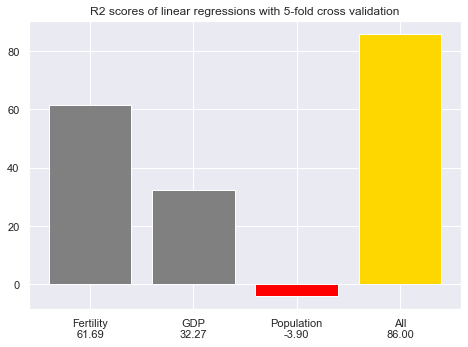

In [491]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Accuracies of each clf

r2_5fold_scores = [fert_r2_5fold_score, gdp_r2_5fold_score, pop_r2_5fold_score, all_r2_5fold_score]
clfs = ['Fertility\n{:.2f}'.format(fert_r2_5fold_score),
        'GDP\n{:.2f}'.format(gdp_r2_5fold_score),
        'Population\n{:.2f}'.format(pop_r2_5fold_score),
        'All\n{:.2f}'.format(all_r2_5fold_score)
       ]

# Hightlight best and worst
color = lambda x: 'red' if x < 0 else 'grey'

clrs = ['gold' if (x == max(r2_5fold_scores)) else color(x) for x in r2_5fold_scores ]

ax.bar(clfs, r2_5fold_scores, color=clrs)
ax.set_title("R2 scores of linear regressions with 5-fold cross validation")
plt.show()

## 2. Logistic Regression

###  Detect credit card fraud based on the different features of our dataset with Logistic Regression.

In [498]:
from pandas import DataFrame as df
df = pd.read_csv('creditcard.csv')
frauds = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]

print(len(frauds), "frauds, ", len(non_frauds), "nonfrauds")

492 frauds,  284315 nonfrauds


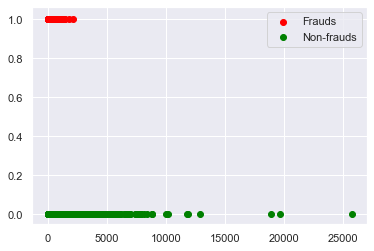

In [517]:
plt.scatter(frauds["Amount"], frauds["Class"], c="red", label="Frauds")
plt.scatter(non_frauds["Amount"], non_frauds["Class"], c="green", label="Non-frauds")
plt.legend()